# ANN (Architecture Neural Network) Hydraulic Fracturing

# Importar librerías para el proyecto

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['agg.path.chunksize'] = 10000
from matplotlib import rcParams

# Cargar y unir data

In [2]:
lista_archivos_csv = []
ubicacion = 'Stage/'

In [3]:
archivos = os.listdir(ubicacion)
archivos 

['A-1 Stage 1.csv',
 'A-1 Stage 10.csv',
 'A-1 Stage 11.csv',
 'A-1 Stage 12.csv',
 'A-1 Stage 13.csv',
 'A-1 Stage 14.csv',
 'A-1 Stage 15.csv',
 'A-1 Stage 16.csv',
 'A-1 Stage 17.csv',
 'A-1 Stage 18.csv',
 'A-1 Stage 19.csv',
 'A-1 Stage 2.csv',
 'A-1 Stage 20.csv',
 'A-1 Stage 21.csv',
 'A-1 Stage 22.csv',
 'A-1 Stage 23.csv',
 'A-1 Stage 24.csv',
 'A-1 Stage 25.csv',
 'A-1 Stage 26.csv',
 'A-1 Stage 27.csv',
 'A-1 Stage 28.csv',
 'A-1 Stage 29.csv',
 'A-1 Stage 3.csv',
 'A-1 Stage 30.csv',
 'A-1 Stage 31.csv',
 'A-1 Stage 32.csv',
 'A-1 Stage 33.csv',
 'A-1 Stage 34.csv',
 'A-1 Stage 35.csv',
 'A-1 Stage 36.csv',
 'A-1 Stage 37.csv',
 'A-1 Stage 38.csv',
 'A-1 Stage 39.csv',
 'A-1 Stage 4.csv',
 'A-1 Stage 40.csv',
 'A-1 Stage 5.csv',
 'A-1 Stage 6.csv',
 'A-1 Stage 7.csv',
 'A-1 Stage 8.csv',
 'A-1 Stage 9.csv']

In [4]:
for archivo in archivos:
    if archivo.lower().endswith('.csv'):
        lista_archivos_csv.append(ubicacion+archivo)
lista_archivos_csv

['Stage/A-1 Stage 1.csv',
 'Stage/A-1 Stage 10.csv',
 'Stage/A-1 Stage 11.csv',
 'Stage/A-1 Stage 12.csv',
 'Stage/A-1 Stage 13.csv',
 'Stage/A-1 Stage 14.csv',
 'Stage/A-1 Stage 15.csv',
 'Stage/A-1 Stage 16.csv',
 'Stage/A-1 Stage 17.csv',
 'Stage/A-1 Stage 18.csv',
 'Stage/A-1 Stage 19.csv',
 'Stage/A-1 Stage 2.csv',
 'Stage/A-1 Stage 20.csv',
 'Stage/A-1 Stage 21.csv',
 'Stage/A-1 Stage 22.csv',
 'Stage/A-1 Stage 23.csv',
 'Stage/A-1 Stage 24.csv',
 'Stage/A-1 Stage 25.csv',
 'Stage/A-1 Stage 26.csv',
 'Stage/A-1 Stage 27.csv',
 'Stage/A-1 Stage 28.csv',
 'Stage/A-1 Stage 29.csv',
 'Stage/A-1 Stage 3.csv',
 'Stage/A-1 Stage 30.csv',
 'Stage/A-1 Stage 31.csv',
 'Stage/A-1 Stage 32.csv',
 'Stage/A-1 Stage 33.csv',
 'Stage/A-1 Stage 34.csv',
 'Stage/A-1 Stage 35.csv',
 'Stage/A-1 Stage 36.csv',
 'Stage/A-1 Stage 37.csv',
 'Stage/A-1 Stage 38.csv',
 'Stage/A-1 Stage 39.csv',
 'Stage/A-1 Stage 4.csv',
 'Stage/A-1 Stage 40.csv',
 'Stage/A-1 Stage 5.csv',
 'Stage/A-1 Stage 6.csv',
 'Stage

In [5]:
df_lista = []
for archivo_csv in lista_archivos_csv:
    df = pd.read_csv(archivo_csv)

    df['Stage_id']= archivo_csv
    df_lista.append(df)
df_lista

[           Time  Truckside_Pressure  Treating_Pressure  Blender_Densometer  \
 0     13.883333                  78                 87               2.462   
 1     13.900000                  80                 87               2.459   
 2     13.916667                  80                 86               2.459   
 3     13.933333                  82                 85               2.466   
 4     13.950000                  83                 85               2.457   
 ...         ...                 ...                ...                 ...   
 4648  91.349998                   1                  4               2.476   
 4649  91.366669                   1                  4               2.473   
 4650  91.383331                   0                  4               2.478   
 4651  91.400002                  -1                  6               2.474   
 4652  91.416664                  -1                  6               2.477   
 
       Blender_Discharge_Pressure  Calc_Clean_Tota

In [6]:
workingdf= pd.concat(df_lista , sort = True)
workingdf

,Blender_1_Densometer,Blender_Densometer,Blender_Densometer_Total,Blender_Discharge_Pressure,Calc_Clean_Rate,Calc_Clean_Stage_Total,Calc_Clean_Total,Calc_Pump_Total,Calc_Slurry_Rate_,Calc_Slurry_Stage_Total__,...,Surfactant Concentration,Surfactant Rate,Surfactant Total,Target_Density,Time,Total_Pump_Rate,Treating_Pressure,Truckside_Pressure,Tub_Level,Volume_To_Next_Stage_
0,2.46,2.462,NaN,83.889999,NaN,NaN,0.000000,NaN,NaN,0.000000,...,0.0,0.0,0.00,0.0,13.883333,0.0,87,78,NaN,NaN
1,2.46,2.459,NaN,83.510002,NaN,NaN,0.000000,NaN,NaN,0.000000,...,0.0,0.0,0.00,0.0,13.900000,0.0,87,80,NaN,NaN
2,2.46,2.459,NaN,83.680000,NaN,NaN,0.000000,NaN,NaN,0.000000,...,0.0,0.0,0.00,0.0,13.916667,0.0,86,80,NaN,NaN
3,2.47,2.466,NaN,83.239998,NaN,NaN,0.000000,NaN,NaN,0.000000,...,0.0,0.0,0.00,0.0,13.933333,0.0,85,82,NaN,NaN
4,2.46,2.457,NaN,83.559998,NaN,NaN,0.000000,NaN,NaN,0.000000,...,0.0,0.0,0.00,0.0,13.950000,0.0,85,83,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,2.52,2.517,249318.0,0.290000,0.0,500.100006,3538.300049,3842.0,0.0,500.149994,...,0.0,0.0,34.68,NaN,67.383331,0.0,-31,-9,52.0,9497.0
4044,2.52,2.517,249318.0,0.280000,0.0,500.100006,3538.300049,3842.0,0.0,500.149994,...,0.0,0.0,34.68,NaN,67.400002,0.0,-33,-9,52.0,9497.0
4045,2.52,2.518,249318.0,0.250000,0.0,500.100006,3538.300049,3842.0,0.0,500.149994,...,0.0,0.0,34.68,NaN,67.416664,0.0,-33,-9,52.0,9497.0
4046,2.52,2.517,249318.0,0.170000,0.0,500.100006,3538.300049,3842.0,0.0,500.149994,...,0.0,0.0,34.68,NaN,67.433334,0.0,-34,-9,52.0,9497.0


In [7]:
workingdf.columns

Index(['Blender_1_Densometer', 'Blender_Densometer',
       'Blender_Densometer_Total', 'Blender_Discharge_Pressure',
       'Calc_Clean_Rate', 'Calc_Clean_Stage_Total', 'Calc_Clean_Total',
       'Calc_Pump_Total', 'Calc_Slurry_Rate_', 'Calc_Slurry_Stage_Total__',
       'Calc_Slurry_Total_', 'Chem_Conc_DA_1', 'Chem_Conc_DA_2',
       'Chem_Conc_LA_5', 'Chem_Conc_LA_6', 'Chem_Conc_LA_7', 'Chem_Conc_LA_8',
       'Chem_Rate_DA_1', 'Chem_Rate_DA_2', 'Chem_Rate_LA_5', 'Chem_Rate_LA_6',
       'Chem_Rate_LA_7', 'Chem_Rate_LA_8', 'Chem_Total_DA_1',
       'Chem_Total_DA_2', 'Chem_Total_LA_5', 'Chem_Total_LA_6',
       'Chem_Total_LA_7', 'Chem_Total_LA_8', 'Clean_Prop_Rate', 'Clean_Rate',
       'Clean_Stage_Total', 'Clean_Total', 'Combined_DA_Conc',
       'Combined_Discharge_Rate', 'Combined_Discharge_Total',
       'Combined_Suction_Rate', 'Combined_Suction_Total', 'Discharge_Rate',
       'Discharge_Stage_Total', 'Discharge_Total', 'Dry_FR_Conc',
       'FR-350_Conc_LA_2', 'FR-350_Rate_

# Matriz de correlación de variables 

Wall time: 3.82 s


<AxesSubplot:>

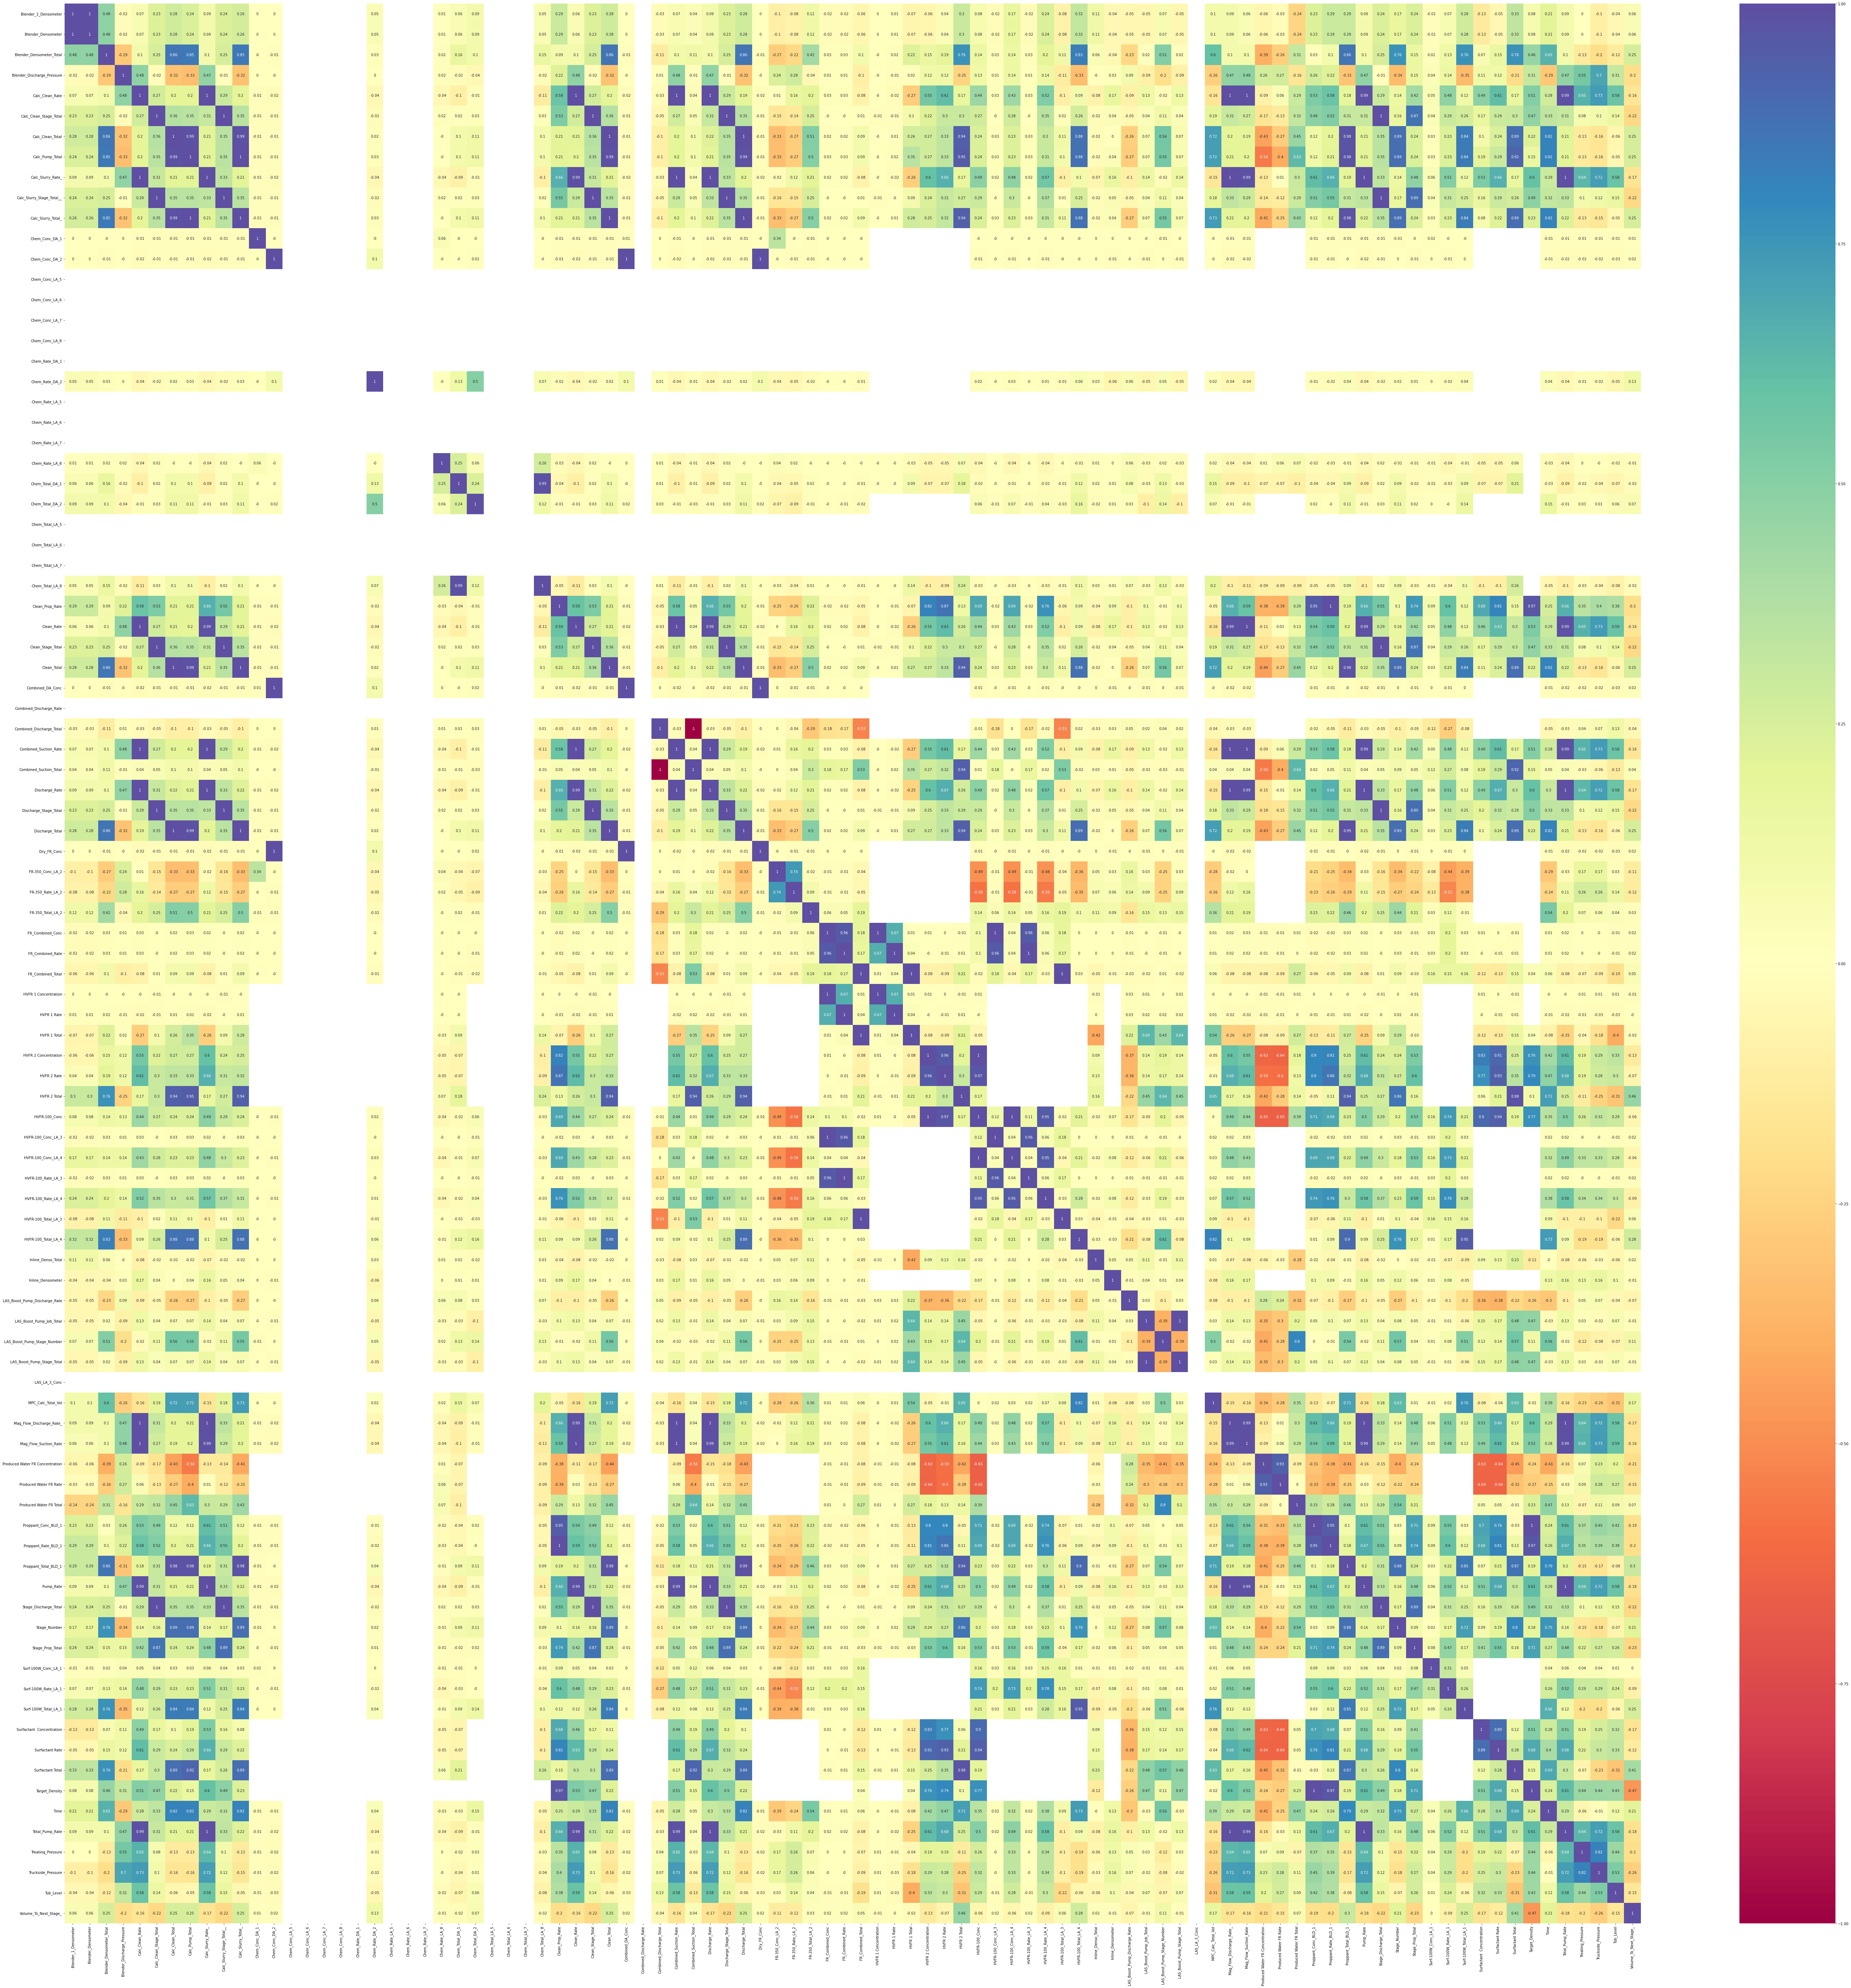

In [8]:
%%time
corrMatrix =  workingdf.corr(method='pearson').round(2)
fig, ax = plt.subplots(figsize=(100,100)) 
sns.heatmap(corrMatrix, annot=True, cmap = 'Spectral',ax=ax)

In [9]:
# Variables de más correlación con la variable a predecir
# Treating Pressure con Blender Discharge Pressure, Calc Clean Rate, Calc Slurry Rate, Clean_Rate, Combined Suction Rate,
# Discharge Rate, Mag Flow Discharge Rate, Mag Flow Suction Rate, Pump Rate, Total Pump Rate,  Propant Conc BLD1, 
# Propant Rate BLD

In [10]:
extract_columns = [ 'Stage_id','Blender_Discharge_Pressure', 'Calc_Clean_Rate', 'Calc_Slurry_Rate_','Clean_Rate', 
                   'Combined_Suction_Rate', 'Discharge_Rate', 'Mag_Flow_Discharge_Rate_', 'Mag_Flow_Suction_Rate',
                   'Proppant_Conc_BLD_1', 'Proppant_Rate_BLD_1', 'Pump_Rate', 'Total_Pump_Rate',
                  'Treating_Pressure','Truckside_Pressure']

In [11]:
df = workingdf[extract_columns]

In [12]:
df

,Stage_id,Blender_Discharge_Pressure,Calc_Clean_Rate,Calc_Slurry_Rate_,Clean_Rate,Combined_Suction_Rate,Discharge_Rate,Mag_Flow_Discharge_Rate_,Mag_Flow_Suction_Rate,Proppant_Conc_BLD_1,Proppant_Rate_BLD_1,Pump_Rate,Total_Pump_Rate,Treating_Pressure,Truckside_Pressure
0,Stage/A-1 Stage 1.csv,83.889999,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,87,78
1,Stage/A-1 Stage 1.csv,83.510002,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,87,80
2,Stage/A-1 Stage 1.csv,83.680000,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,86,80
3,Stage/A-1 Stage 1.csv,83.239998,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,85,82
4,Stage/A-1 Stage 1.csv,83.559998,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,85,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,Stage/A-1 Stage 9.csv,0.290000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-31,-9
4044,Stage/A-1 Stage 9.csv,0.280000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33,-9
4045,Stage/A-1 Stage 9.csv,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33,-9
4046,Stage/A-1 Stage 9.csv,0.170000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34,-9


In [13]:
##%%time
##sns.pairplot(df, corner=True)

In [14]:
df = df.reset_index()

In [15]:
df = df[extract_columns]
df

,Stage_id,Blender_Discharge_Pressure,Calc_Clean_Rate,Calc_Slurry_Rate_,Clean_Rate,Combined_Suction_Rate,Discharge_Rate,Mag_Flow_Discharge_Rate_,Mag_Flow_Suction_Rate,Proppant_Conc_BLD_1,Proppant_Rate_BLD_1,Pump_Rate,Total_Pump_Rate,Treating_Pressure,Truckside_Pressure
0,Stage/A-1 Stage 1.csv,83.889999,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,87,78
1,Stage/A-1 Stage 1.csv,83.510002,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,87,80
2,Stage/A-1 Stage 1.csv,83.680000,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,86,80
3,Stage/A-1 Stage 1.csv,83.239998,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,85,82
4,Stage/A-1 Stage 1.csv,83.559998,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,85,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149460,Stage/A-1 Stage 9.csv,0.290000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-31,-9
149461,Stage/A-1 Stage 9.csv,0.280000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33,-9
149462,Stage/A-1 Stage 9.csv,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33,-9
149463,Stage/A-1 Stage 9.csv,0.170000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34,-9


In [16]:
lista_stage = list(df['Stage_id'].unique())
lista_stage

['Stage/A-1 Stage 1.csv',
 'Stage/A-1 Stage 10.csv',
 'Stage/A-1 Stage 11.csv',
 'Stage/A-1 Stage 12.csv',
 'Stage/A-1 Stage 13.csv',
 'Stage/A-1 Stage 14.csv',
 'Stage/A-1 Stage 15.csv',
 'Stage/A-1 Stage 16.csv',
 'Stage/A-1 Stage 17.csv',
 'Stage/A-1 Stage 18.csv',
 'Stage/A-1 Stage 19.csv',
 'Stage/A-1 Stage 2.csv',
 'Stage/A-1 Stage 20.csv',
 'Stage/A-1 Stage 21.csv',
 'Stage/A-1 Stage 22.csv',
 'Stage/A-1 Stage 23.csv',
 'Stage/A-1 Stage 24.csv',
 'Stage/A-1 Stage 25.csv',
 'Stage/A-1 Stage 26.csv',
 'Stage/A-1 Stage 27.csv',
 'Stage/A-1 Stage 28.csv',
 'Stage/A-1 Stage 29.csv',
 'Stage/A-1 Stage 3.csv',
 'Stage/A-1 Stage 30.csv',
 'Stage/A-1 Stage 31.csv',
 'Stage/A-1 Stage 32.csv',
 'Stage/A-1 Stage 33.csv',
 'Stage/A-1 Stage 34.csv',
 'Stage/A-1 Stage 35.csv',
 'Stage/A-1 Stage 36.csv',
 'Stage/A-1 Stage 37.csv',
 'Stage/A-1 Stage 38.csv',
 'Stage/A-1 Stage 39.csv',
 'Stage/A-1 Stage 4.csv',
 'Stage/A-1 Stage 40.csv',
 'Stage/A-1 Stage 5.csv',
 'Stage/A-1 Stage 6.csv',
 'Stage

In [17]:
lista_id = list(range(1,40+1))

In [18]:
lista_id

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [19]:
df['Stage_id'].replace((lista_stage),(lista_id),inplace=True)

In [20]:
df

,Stage_id,Blender_Discharge_Pressure,Calc_Clean_Rate,Calc_Slurry_Rate_,Clean_Rate,Combined_Suction_Rate,Discharge_Rate,Mag_Flow_Discharge_Rate_,Mag_Flow_Suction_Rate,Proppant_Conc_BLD_1,Proppant_Rate_BLD_1,Pump_Rate,Total_Pump_Rate,Treating_Pressure,Truckside_Pressure
0,1,83.889999,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,87,78
1,1,83.510002,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,87,80
2,1,83.680000,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,86,80
3,1,83.239998,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,85,82
4,1,83.559998,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,85,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149460,40,0.290000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-31,-9
149461,40,0.280000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33,-9
149462,40,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33,-9
149463,40,0.170000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34,-9


In [21]:
df.head()

,Stage_id,Blender_Discharge_Pressure,Calc_Clean_Rate,Calc_Slurry_Rate_,Clean_Rate,Combined_Suction_Rate,Discharge_Rate,Mag_Flow_Discharge_Rate_,Mag_Flow_Suction_Rate,Proppant_Conc_BLD_1,Proppant_Rate_BLD_1,Pump_Rate,Total_Pump_Rate,Treating_Pressure,Truckside_Pressure
0,1,83.889999,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,87,78
1,1,83.510002,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,87,80
2,1,83.680000,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,86,80
3,1,83.239998,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,85,82
4,1,83.559998,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,85,83


In [22]:
df.isnull().sum()

Stage_id                          0
Blender_Discharge_Pressure        0
Calc_Clean_Rate               12874
Calc_Slurry_Rate_             12874
Clean_Rate                        0
Combined_Suction_Rate         12874
Discharge_Rate                    0
Mag_Flow_Discharge_Rate_      12874
Mag_Flow_Suction_Rate         12874
Proppant_Conc_BLD_1            8675
Proppant_Rate_BLD_1           12874
Pump_Rate                         0
Total_Pump_Rate                   0
Treating_Pressure                 0
Truckside_Pressure                0
dtype: int64

In [23]:
df.shape

(149465, 15)

In [24]:
# Units
# Time (min)
# Treating_Pressure (psi)
# Blender_Densometer(lbm/gal)
# Blender_Discharge_Pressure (psi)
# Cal_Clean_total (bbl)
# Surfactant Concentration ( gal/1000 gal)
# Surfactant Rate ( U.S. gpm)
# Surfactant total (U.S. gal)
# Producer Water FR Concentration ( gal/1000/gal)
# Produced Water FR Rate ( U.S. gpm)
# Produced Water FR Total (U.S gal)
# HVFR 1 Concentration (gal/1000 gal)
# HVFR 1 Rate ( U.S gpm)
# HVFR 1 Total (U.S gal)
# HVFR 2 Concentration (gal/1000 gal)
# HVFR 2 Rate ( U.S gpm)
# HVFR 2 Total (U.S gal)
# Clean Rate ( bpm)
# Clean Total (bbl)
# Discharge Rate (bpm)
# Discharge Total ( bbl)
# Proppant_Total_BLD_1 (lbm)
# Stage_Discharge_Total (bbl)
# Stage Number
# Target Density (lbm/gal)
# Total pump rate (bpm)
# Blender_1_ Densometer (lbm/gal)
# Pump_rate (bpm)
# Calc_Slurry_Stage_total (bbl)
# Calc_Slurry_total (bbl)
# Stage_ Prop_total (lbm)
# FR_Combined_conc (gal/1000 gal)
# FR_Combined_rate (U.S gpm)
# FR_Combined_total (U.S gal)

In [25]:
df = df.fillna(0)

In [26]:
df.isnull().sum()

Stage_id                      0
Blender_Discharge_Pressure    0
Calc_Clean_Rate               0
Calc_Slurry_Rate_             0
Clean_Rate                    0
Combined_Suction_Rate         0
Discharge_Rate                0
Mag_Flow_Discharge_Rate_      0
Mag_Flow_Suction_Rate         0
Proppant_Conc_BLD_1           0
Proppant_Rate_BLD_1           0
Pump_Rate                     0
Total_Pump_Rate               0
Treating_Pressure             0
Truckside_Pressure            0
dtype: int64

# Diagrama de caja y bigotes 

In [27]:
def diagrama_de_cajas(df, params): 
  fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))
  axs = axs.ravel()

  for ax, i in zip(axs, params):
    ax = sns.boxplot(data=df[i],palette="Set3", ax=ax);
    ax.set_xticks([])
    ax.set_xlabel(i)

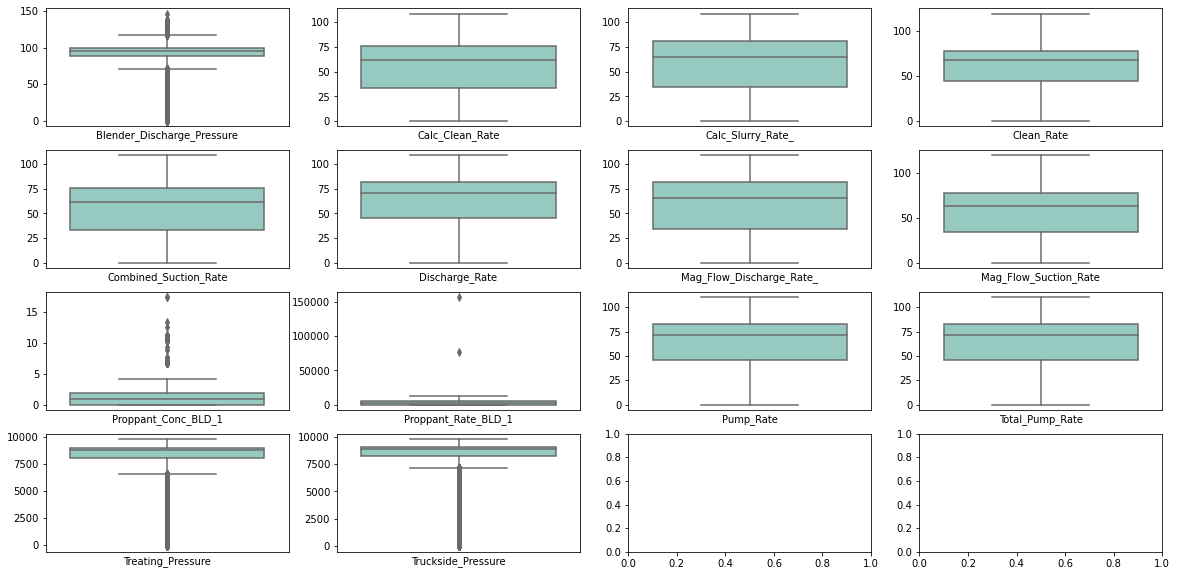

In [28]:
diagrama_de_cajas(df, df.keys().drop(['Stage_id']))

# Limpieza de atípicos 

In [29]:
def outlier_replacer(df,params,n_std):  
  remove = df[params]
  for i in remove.keys():

    min,max = remove[i].mean()-(n_std*remove[i].std()),remove[i].mean()+(n_std*remove[i].std())

    min_idx = list(remove.loc[remove[i]<=min].index.values)
    max_idx = list(remove.loc[remove[i]>=max].index.values)

    remove.at[min_idx,i] = min
    remove.at[max_idx,i] = max

    df[i] = remove[i]

  return df

In [30]:
df.columns

Index(['Stage_id', 'Blender_Discharge_Pressure', 'Calc_Clean_Rate',
       'Calc_Slurry_Rate_', 'Clean_Rate', 'Combined_Suction_Rate',
       'Discharge_Rate', 'Mag_Flow_Discharge_Rate_', 'Mag_Flow_Suction_Rate',
       'Proppant_Conc_BLD_1', 'Proppant_Rate_BLD_1', 'Pump_Rate',
       'Total_Pump_Rate', 'Treating_Pressure', 'Truckside_Pressure'],
      dtype='object')

In [31]:
df1 = outlier_replacer(df,df.keys().drop(['Stage_id','Calc_Clean_Rate',
       'Calc_Slurry_Rate_', 'Clean_Rate', 'Combined_Suction_Rate',
       'Discharge_Rate', 'Mag_Flow_Discharge_Rate_', 'Mag_Flow_Suction_Rate',
        'Pump_Rate','Total_Pump_Rate']),1.5)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


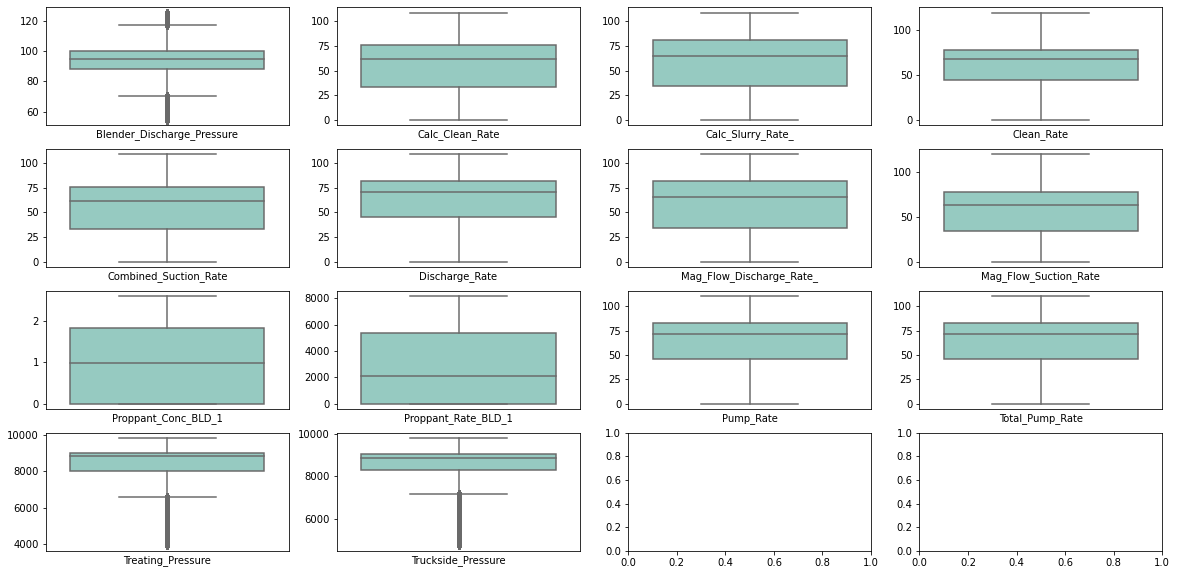

In [32]:
diagrama_de_cajas(df1, df1.keys().drop(['Stage_id']))

In [33]:
df1.dtypes

Stage_id                        int64
Blender_Discharge_Pressure    float64
Calc_Clean_Rate               float64
Calc_Slurry_Rate_             float64
Clean_Rate                    float64
Combined_Suction_Rate         float64
Discharge_Rate                float64
Mag_Flow_Discharge_Rate_      float64
Mag_Flow_Suction_Rate         float64
Proppant_Conc_BLD_1           float64
Proppant_Rate_BLD_1           float64
Pump_Rate                     float64
Total_Pump_Rate               float64
Treating_Pressure             float64
Truckside_Pressure            float64
dtype: object

In [34]:
df1.columns

Index(['Stage_id', 'Blender_Discharge_Pressure', 'Calc_Clean_Rate',
       'Calc_Slurry_Rate_', 'Clean_Rate', 'Combined_Suction_Rate',
       'Discharge_Rate', 'Mag_Flow_Discharge_Rate_', 'Mag_Flow_Suction_Rate',
       'Proppant_Conc_BLD_1', 'Proppant_Rate_BLD_1', 'Pump_Rate',
       'Total_Pump_Rate', 'Treating_Pressure', 'Truckside_Pressure'],
      dtype='object')

In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

transformer = make_column_transformer(
    (MinMaxScaler(), ['Blender_Discharge_Pressure', 'Calc_Clean_Rate',
       'Calc_Slurry_Rate_', 'Clean_Rate', 'Combined_Suction_Rate',
       'Discharge_Rate', 'Mag_Flow_Discharge_Rate_', 'Mag_Flow_Suction_Rate',
       'Proppant_Conc_BLD_1', 'Proppant_Rate_BLD_1', 'Pump_Rate',
       'Total_Pump_Rate'])
)

In [36]:
df1

,Stage_id,Blender_Discharge_Pressure,Calc_Clean_Rate,Calc_Slurry_Rate_,Clean_Rate,Combined_Suction_Rate,Discharge_Rate,Mag_Flow_Discharge_Rate_,Mag_Flow_Suction_Rate,Proppant_Conc_BLD_1,Proppant_Rate_BLD_1,Pump_Rate,Total_Pump_Rate,Treating_Pressure,Truckside_Pressure
0,1,83.889999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3931.250026,4758.9465
1,1,83.510002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3931.250026,4758.9465
2,1,83.680000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3931.250026,4758.9465
3,1,83.239998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3931.250026,4758.9465
4,1,83.559998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3931.250026,4758.9465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149460,40,54.355736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3931.250026,4758.9465
149461,40,54.355736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3931.250026,4758.9465
149462,40,54.355736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3931.250026,4758.9465
149463,40,54.355736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3931.250026,4758.9465


In [37]:
from sklearn.model_selection import train_test_split

X = df.drop('Treating_Pressure', axis=1)
y = df['Treating_Pressure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((119572, 14), (29893, 14))

In [38]:
# Fit on the train set
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [39]:
X_train.shape, X_test.shape

((119572, 12), (29893, 12))

In [40]:
X_train

array([[0.79401444, 0.28676471, 0.2933174 , ..., 0.08070506, 0.30308533,
        0.30308533],
       [0.4047935 , 0.74172789, 0.74197996, ..., 0.        , 0.74500908,
        0.74500908],
       [0.80840931, 0.47977941, 0.50050557, ..., 0.25291504, 0.5       ,
        0.5       ],
       ...,
       [0.6504849 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.54399064, 0.41636027, 0.43551798, ..., 0.23427856, 0.44736842,
        0.44736842],
       [0.62351194, 0.59374997, 0.66384778, ..., 0.85534385, 0.67241379,
        0.67241379]])

In [41]:
#X_train.toarray()

In [42]:
#X_train = X_train.toarray()
#X_test = X_test.toarray()

# Aplicación del modelo neuronal

In [43]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [44]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [45]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='relu'),
    Dense(1)
])

In [46]:
model.compile(
    loss=rmse,
    optimizer='adam',
    metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
)

**Nota:** Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o las diferencias en la precisión numérica. Considere la posibilidad de ejecutar el ejemplo varias veces y comparar el resultado promedio.

Al ejecutar el ejemplo, se imprimen los valores de las métricas al final de cada época.

In [47]:
history= model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3737/3737 [==============================] - 4s 1ms/step - loss: 1666.5388 - mean_squared_error: 4639491.5000 - mean_absolute_error: 1349.7668 - mean_absolute_percentage_error: 18.9254 - cosine_proximity: 0.9996
Epoch 2/100
3737/3737 [==============================] - 4s 1ms/step - loss: 1229.4725 - mean_squared_error: 1573066.1250 - mean_absolute_error: 909.5096 - mean_absolute_percentage_error: 13.4328 - cosine_proximity: 1.0000
Epoch 3/100
3737/3737 [==============================] - 4s 1ms/step - loss: 1209.6332 - mean_squared_error: 1529713.6250 - mean_absolute_error: 884.9747 - mean_absolute_percentage_error: 13.0544 - cosine_proximity: 1.0000
Epoch 4/100
3737/3737 [==============================] - 4s 1ms/step - loss: 1204.5206 - mean_squared_error: 1519754.2500 - mean_absolute_error: 875.7624 - mean_absolute_percentage_error: 12.9198 - cosine_proximity: 1.0000
Epoch 5/100
3737/3737 [==============================] - 4s 1ms/step - loss: 1193.8019 - mean_squared_error

3737/3737 [==============================] - 4s 1ms/step - loss: 1099.2976 - mean_squared_error: 1295041.5000 - mean_absolute_error: 749.4003 - mean_absolute_percentage_error: 11.2643 - cosine_proximity: 1.0000
Epoch 73/100
3737/3737 [==============================] - 5s 1ms/step - loss: 1095.1407 - mean_squared_error: 1290769.6250 - mean_absolute_error: 746.0375 - mean_absolute_percentage_error: 11.2262 - cosine_proximity: 1.0000
Epoch 74/100
3737/3737 [==============================] - 5s 1ms/step - loss: 1093.4949 - mean_squared_error: 1284698.8750 - mean_absolute_error: 742.9393 - mean_absolute_percentage_error: 11.1904 - cosine_proximity: 1.0000
Epoch 75/100
3737/3737 [==============================] - 4s 1ms/step - loss: 1091.9607 - mean_squared_error: 1281731.7500 - mean_absolute_error: 740.0255 - mean_absolute_percentage_error: 11.1563 - cosine_proximity: 1.0000
Epoch 76/100
3737/3737 [==============================] - 5s 1ms/step - loss: 1085.2883 - mean_squared_error: 1267434

A continuación, se crea un gráfico de líneas de las 4 métricas sobre las épocas de entrenamiento.

- Error medio cuadrado: mean_squared_error, MSE o mse
- Error absoluto medio: mean_absolute_error, MAE, mae
- Error de porcentaje absoluto medio: mean_absolute_percentage_error, MAPE, mape
- Proximidad coseno: coseno_proximidad, coseno

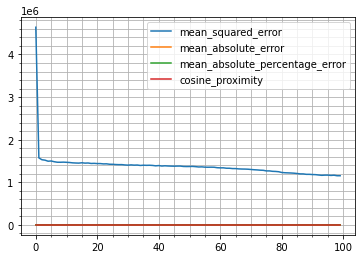

In [53]:
plt.plot(history.history['mean_squared_error'],label='mean_squared_error')
plt.plot(history.history['mean_absolute_error'],label='mean_absolute_error')
plt.plot(history.history['mean_absolute_percentage_error'],label='mean_absolute_percentage_error')
plt.plot(history.history['cosine_proximity'],label='cosine_proximity')
plt.legend()
plt.grid(True, 'major')
plt.minorticks_on()
plt.grid(True, 'minor')
plt.show()

In [54]:
predictions = model.predict(X_test)
predictions[:5]
predictions = np.ravel(predictions)
predictions[:5]
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
rmse(y_test, predictions).numpy()

952.7289420993716

In [55]:
y_test
predictions
result = {'Data_real':y_test,
         'Data_predecida':predictions}
data_result = pd.DataFrame(result)
data_result = data_result.reset_index()
extract =['Data_real', 'Data_predecida']
data_result = data_result[extract]
data_result

,Data_real,Data_predecida
0,9130.0,8723.524414
1,9052.0,8760.734375
2,8797.0,8807.910156
3,8075.0,8003.493652
4,8881.0,8727.352539
...,...,...
29888,8965.0,8821.299805
29889,8369.0,8602.503906
29890,5197.0,4366.932617
29891,7732.0,8498.638672


In [56]:
data_result = data_result.head(50)

In [60]:
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

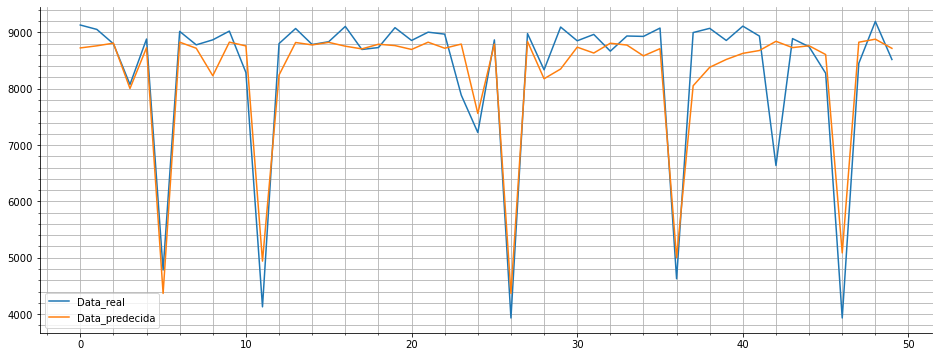

In [61]:
data_result.plot()
plt.grid(True, 'major')
plt.minorticks_on()
plt.grid(True, 'minor')